### [Here](https://github.com/microsoft/ML-For-Beginners/blob/main/5-Clustering/2-K-Means/README.md)

It is used to divide and partition groups of data into 'k' clusters using a series of observations. Each observation works to group a given datapoint closest to its nearest 'mean', or the center point of a cluster.

The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:
- It assigns each sample to the nearest centroid.
- It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
- Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.cluster import KMeans

In [ ]:
# Usual
df = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/5-Clustering/data/nigerian-songs.csv')

df = df[df['artist_top_genre'] != 'Missing']

df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]

**Boxplot**

<AxesSubplot:xlabel='release_date'>

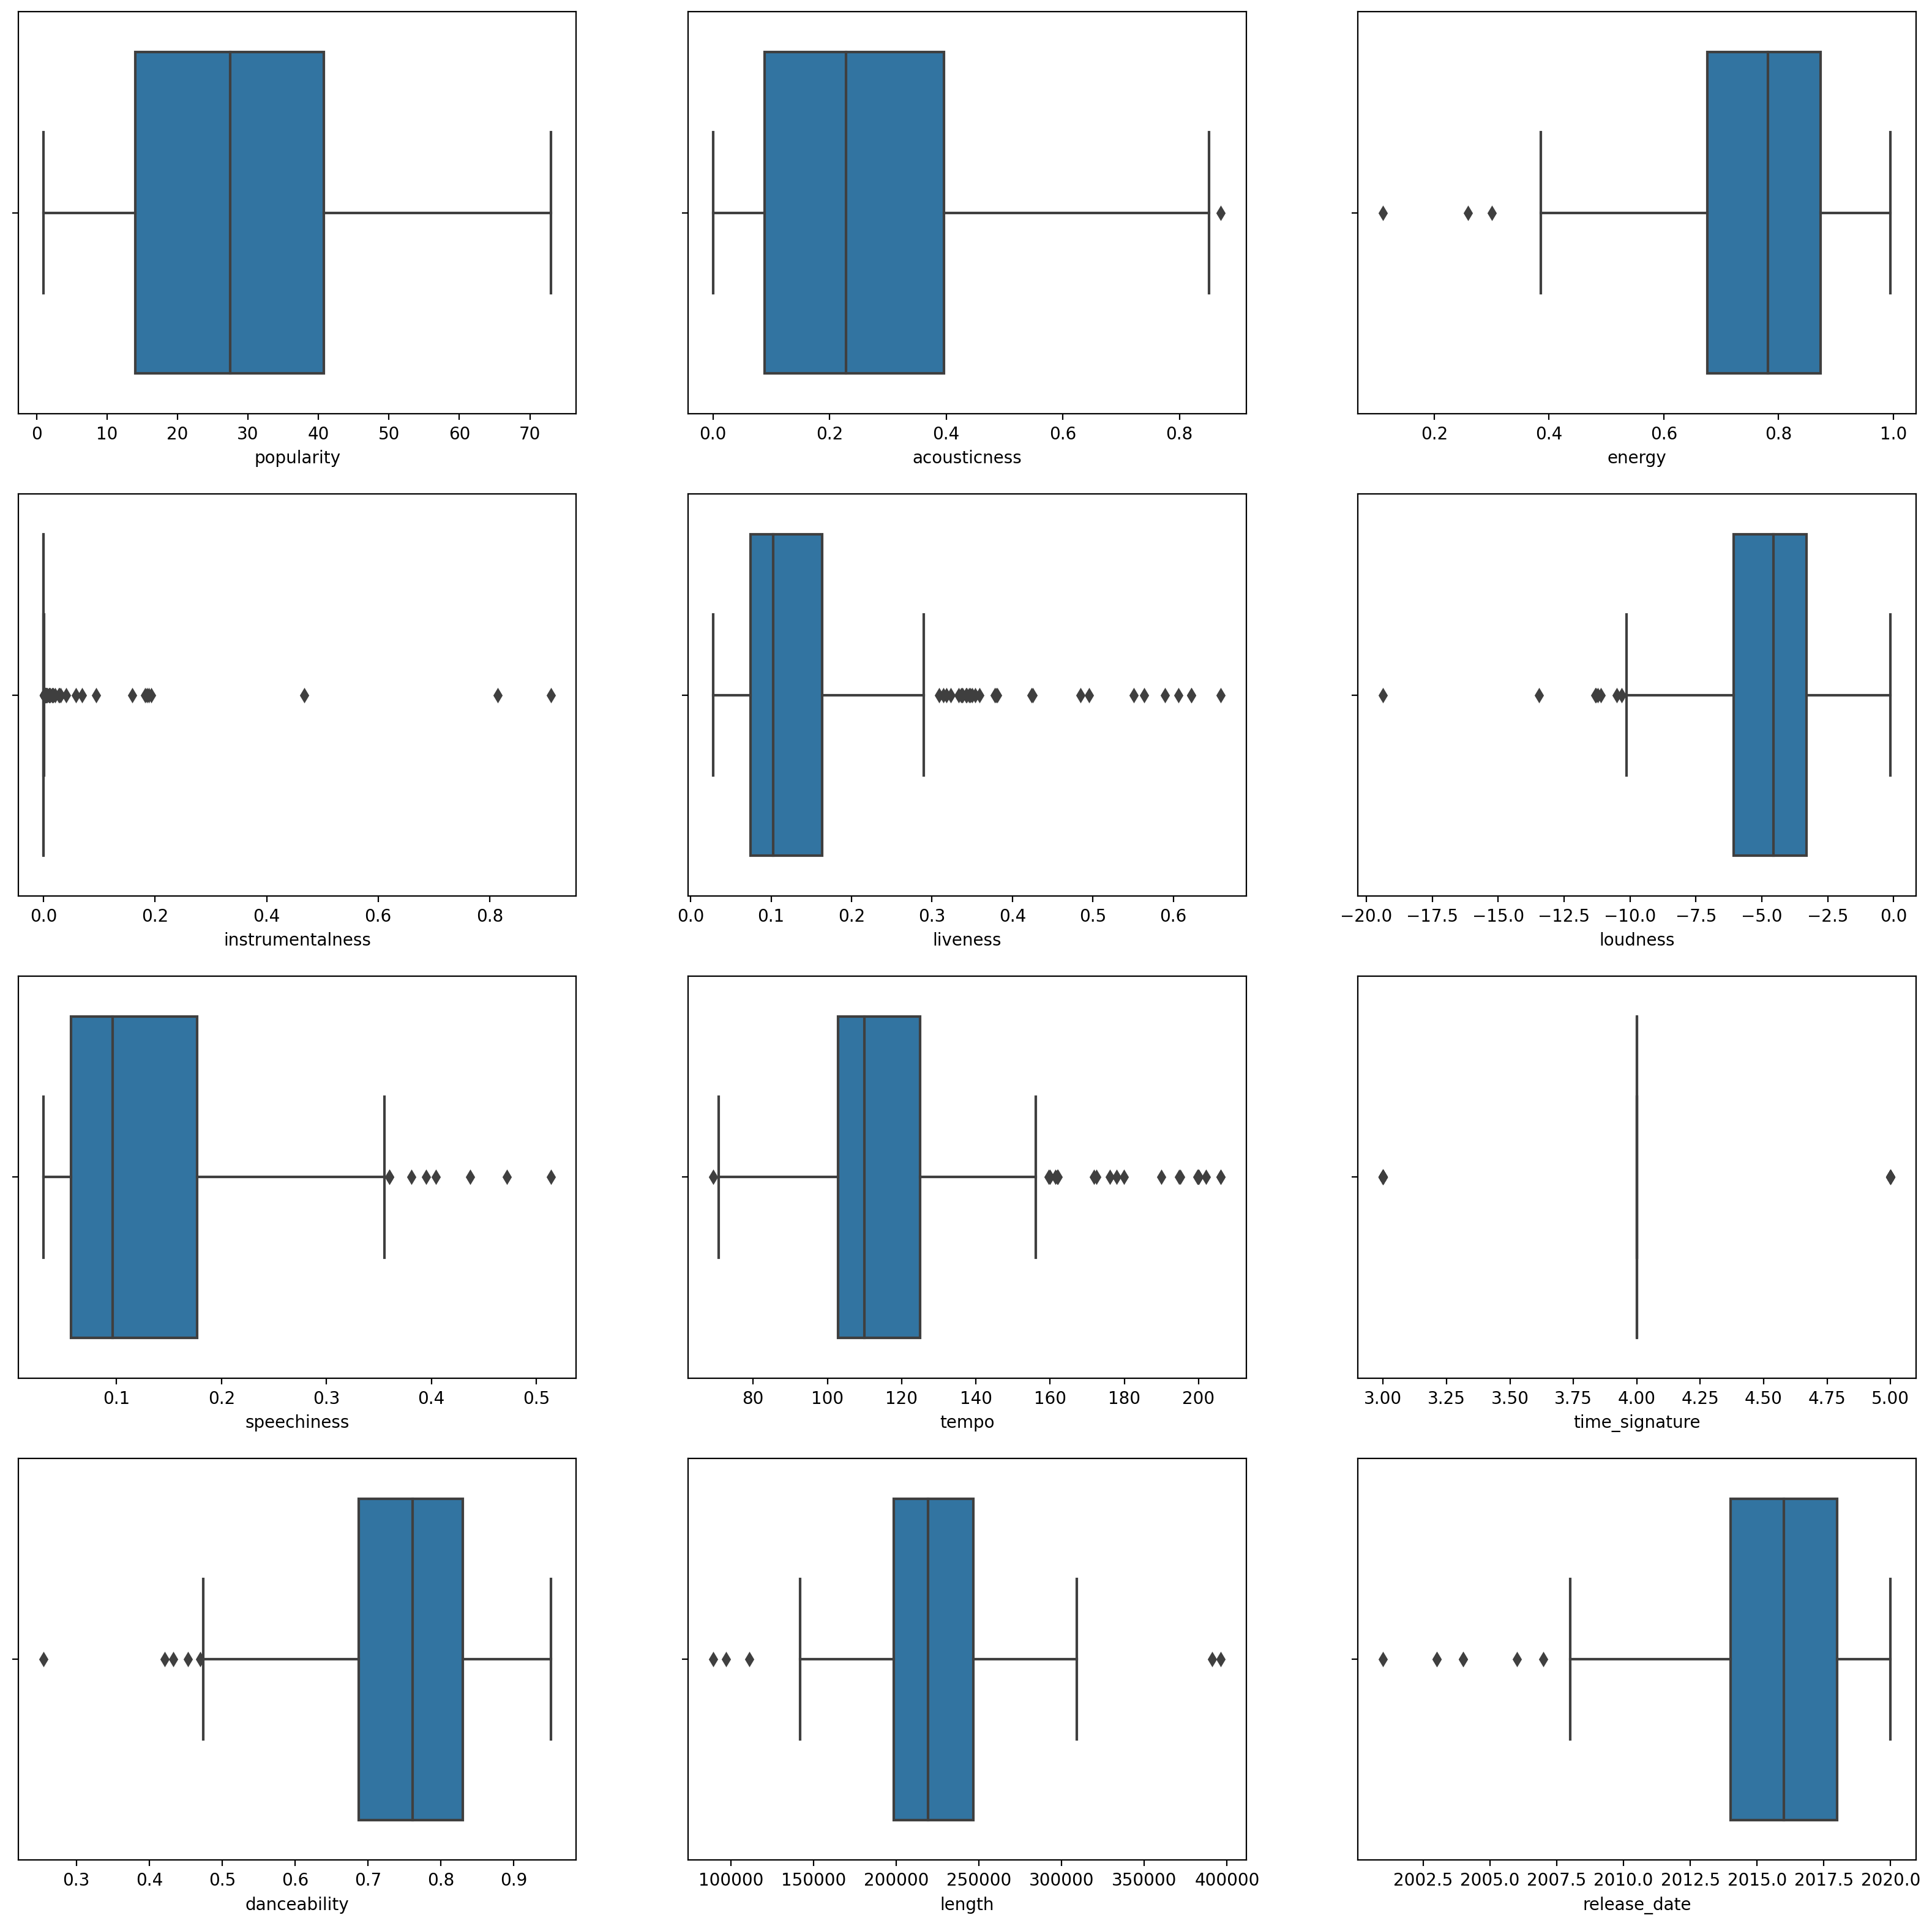

In [6]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)


For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

In [14]:
X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3:

In [25]:
nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
# y_cluster_kmeans

In [30]:
c,d = 0,0

for i in range(len(y_cluster_kmeans)):
    if y_cluster_kmeans[i] == y[i]:
        c+=1
    else:
        d+=1
print(c,d,c+d)
print('accuracy is', (c/286) *100)

69 217 286
accuracy is 24.125874125874127


### Silhouette score

Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.source.

Our score is .53, so right in the middle. This indicates that our data is not particularly well-suited to this type of clustering, but let's continue.

In [31]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [32]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

 range: These are the iterations of the clustering process

🎓 random_state: "Determines random number generation for centroid initialization."source

🎓 WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid.source.

🎓 Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are."source. The value is appended to the wcss variable on each iteration.

🎓 k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

## Elbow method

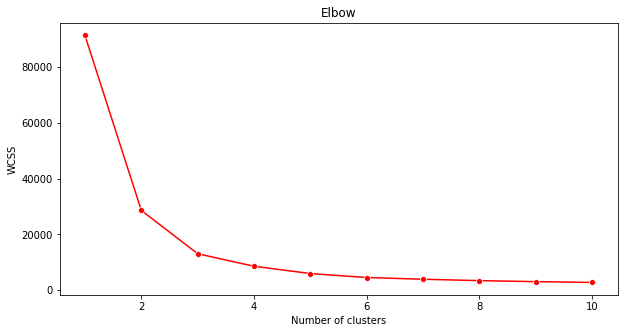

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(x = range(1, 11), y = wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Use the wcss variable that you built in the previous step to create a chart showing where the 'bend' in the elbow is, which indicates the optimum number of clusters. Maybe it is 3!

### AGAIN

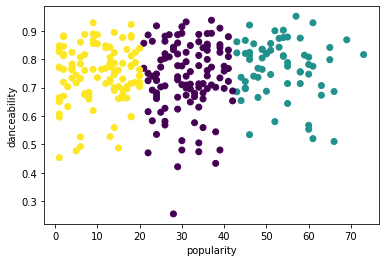

In [42]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [43]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 112 out of 286 samples were correctly labeled.
Accuracy score: 0.39
